In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [40]:
data = pd.read_csv("creditcard.csv")

In [41]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
#To display every column
pd.options.display.max_columns=None
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
data.shape

(284807, 31)

In [44]:
print("Number of Rows", data.shape[0])
print ("Number Of Columns",data.shape[1])

Number of Rows 284807
Number Of Columns 31


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [46]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
sc = StandardScaler()
data["Amount"]=sc.fit_transform(pd.DataFrame(data["Amount"]))

In [49]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [50]:
data = data.drop(['Time'],axis=1)

In [51]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [52]:
data.shape

(284807, 30)

In [53]:
data.duplicated().any()

True

In [54]:
data = data.drop_duplicates()

In [55]:
data.shape

(275663, 30)

In [142]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

C:\Users\Akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

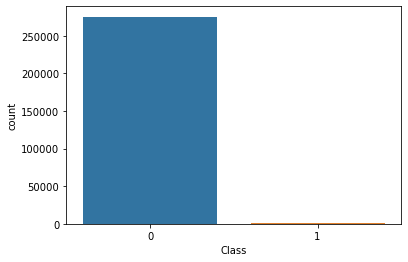

In [143]:
sns.countplot(data['Class'])

### Store Feature Matrix In X And Respomse (Target) in Vector y

In [138]:
X =data.drop('Class',axis=1)
y =data['Class']

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
#Undersampling
#Oversampling

In [22]:
log = LogisticRegression() #Creating instance
log.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred1 = log.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred1)

0.9992200678359603

In [25]:
precision_score(y_test,y_pred1)

0.8870967741935484

In [26]:
recall_score(y_test,y_pred1)

0.6043956043956044

In [27]:
f1_score(y_test,y_pred1)

0.718954248366013

In [30]:
normal = data[data["Class"]==0]
fraud = data[data["Class"]==1]

In [31]:
normal.shape

(275190, 30)

In [32]:
fraud.shape

(473, 30)

In [33]:
normal_sample = normal.sample(n=473)

In [34]:
normal_sample.shape

(473, 30)

In [35]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [36]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [37]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.053211,-0.006078,3.771745,3.267003,-0.444616,2.009100,-0.867864,0.673824,0.205380,0.660166,0.428784,0.898204,0.109324,-1.322361,-1.534255,-0.841125,0.663368,0.301231,1.202666,0.562096,0.173729,1.091678,-0.198719,0.089115,0.151629,0.534379,0.243346,-0.058587,-0.146648,0
1,1.085444,-2.426717,-1.318949,-1.265569,-1.300254,-0.301058,-0.215289,0.026086,2.072680,-0.928265,0.905557,0.565843,-1.389956,0.623013,1.168538,0.021326,-0.538628,1.043638,0.527077,0.735226,0.543577,0.575710,-0.254539,0.735194,-0.376632,-0.250487,-0.076142,0.034681,1.607032,0
2,-0.472319,0.948928,1.251450,-0.147409,0.415181,0.272404,0.422244,0.378912,-0.591648,-0.418025,1.858919,0.532830,-0.478948,-0.081467,0.751521,0.010297,0.347595,-0.491335,-0.522580,0.031277,-0.161185,-0.383701,0.039528,-0.351149,-0.354086,0.115291,0.271812,0.080337,-0.338876,0
3,1.255362,0.206286,0.380454,0.642120,-0.468166,-1.046403,0.102356,-0.204612,0.092601,-0.044232,-0.339409,0.059137,-0.272631,0.378956,0.986269,0.227918,-0.343772,-0.470039,-0.105924,-0.120789,-0.205455,-0.615235,0.081610,0.378939,0.300221,0.174402,-0.039242,0.015131,-0.322244,0
4,2.144598,-0.727815,-1.470920,-0.769528,-0.454039,-1.344313,-0.051631,-0.463382,-0.595190,0.766059,-0.599448,-0.198631,0.475196,-0.061534,-0.400099,0.453740,0.466863,-2.000995,0.743668,0.041674,0.118153,0.340901,0.102801,0.024450,0.077558,-0.202016,-0.047252,-0.059862,-0.149327,0


In [38]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Logistic Regression(After Undersampling)

In [40]:
log = LogisticRegression() #Creating instance
log.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred1 = log.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred1)

0.9450924815581961

In [58]:
precision_score(y_test,y_pred1)

0.9730612402651362

In [59]:
recall_score(y_test,y_pred1)

0.915459156773267

In [60]:
f1_score(y_test,y_pred1)

0.9433817330210773

### Decision Tree Classifier

In [62]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
y_pred2 = dt.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred2)

0.9982739198372034

In [65]:
precision_score(y_test,y_pred2)

0.9976033553025764

In [66]:
recall_score(y_test,y_pred2)

0.9989455120629784

In [67]:
f1_score(y_test,y_pred2)

0.9982739825581396

### Random Forest Classifier

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred3 = rf.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred3)

0.9368421052631579

In [95]:
precision_score(y_test,y_pred3)

0.9591836734693877

In [96]:
recall_score(y_test,y_pred3)

0.9215686274509803

In [97]:
f1_score(y_test,y_pred2)

0.9038461538461539

In [102]:
final_data = pd.DataFrame({"Models":['LR','DT','RF'],
             "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                        accuracy_score(y_test,y_pred2)*100,
                        accuracy_score(y_test,y_pred3)*100]})

In [104]:
final_data

,Models,Accuracy
0,LR,92.631579
1,DT,89.473684
2,RF,93.684211


C:\Users\Akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

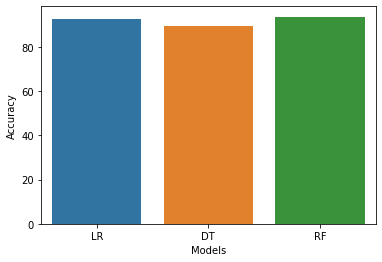

In [105]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

### Oversampling

In [69]:
X =data.drop('Class',axis=1)
y =data['Class']

In [20]:
X.shape

(275663, 29)

In [21]:
y.shape

(275663,)

In [22]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [23]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### Logistic Regression(after oversampling)

In [32]:
log = LogisticRegression() #Creating instance
log.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred1 = log.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred1)

0.9450924815581961

In [35]:
precision_score(y_test,y_pred1)

0.9730612402651362

In [36]:
recall_score(y_test,y_pred1)

0.915459156773267

In [37]:
f1_score(y_test,y_pred1)

0.9433817330210773

### Decsion Tree Classifier (after oversampling)

In [238]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred2 = dt.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred2)

0.9982739198372034

In [241]:
precision_score(y_test,y_pred2)

0.9975841023032769

In [242]:
recall_score(y_test,y_pred2)

0.9984728105739686

In [243]:
f1_score(y_test,y_pred2)

0.9980282585979736

### Randomforest Classifier (after over Sampling)

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred3 = rf.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [72]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [29]:
recall_score(y_test,y_pred3)

1.0

In [73]:
final_data = pd.DataFrame({"Models":['LR','DT','RF'],
             "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                        accuracy_score(y_test,y_pred2)*100,
                        accuracy_score(y_test,y_pred3)*100]})

In [74]:
final_data

,Models,Accuracy
0,LR,94.509248
1,DT,99.827392
2,RF,99.991824


C:\Users\Akhilesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

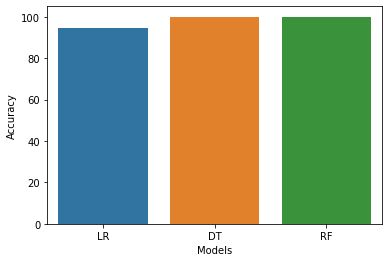

In [75]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

### Save the model

In [76]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [77]:
import joblib

In [78]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [79]:
model = joblib.load("credit_card_model")

In [80]:
model

RandomForestClassifier()

In [85]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\Akhilesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
if pred == 0:
    print("Normal Transaction")
else:
    print("Fradulent Transaction")

Normal Transaction
